In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Importing data
path = "Dataset/train.csv"
data_train = pd.read_csv(path)

In [2]:
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


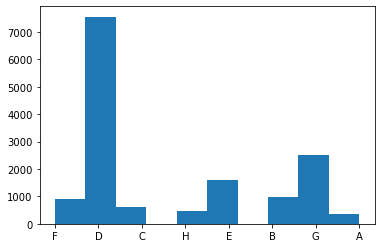

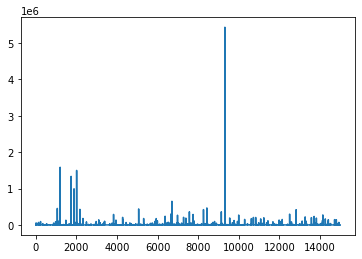

In [4]:
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [4]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

In [7]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [8]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [9]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

In [10]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [5]:

# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  print(bp)
  return bp

train=pd.read_csv("Dataset/train.csv")
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()

00:7:37
00:9:30
00:2:16
00:4:22
00:00:31
00:00:15
00:3:20
00:00:58
00:27:50
00:11:19
00:12:25
00:3:48
00:4:14
2:23:28
00:2:50
00:00:37
00:00:26
00:5:12
00:00:22
00:3:16
00:12:41
00:1:41
00:5:25
00:00:41
00:13:18
00:6:2
00:10:59
00:1:38
00:2:11
2:22:32
00:2:47
00:11:5
00:8:57
00:3:48
00:13:23
00:1:9
00:7:53
1:10:26
00:1:39
00:10:29
00:4:21
00:11:16
00:13:43
00:57:37
00:1:15
1:32:29
00:14:26
00:00:31
00:13:26
00:28:24
00:4:6
00:2:28
00:38:35
00:10:22
00:00:20
00:11:53
00:2:33
00:5:28
00:2:16
00:2:20
00:00:47
00:1:26
00:5:53
00:44:24
00:4:35
00:11:51
00:4:21
00:1:29
00:20:41
00:19:40
00:11:3
00:4:27
00:10:2
00:2:47
00:4:17
00:2:45
00:4:18
2:20:2
00:4:26
00:5:59
00:3:39
00:6:19
00:4:24
00:5:44
00:5:36
00:00:54
00:13:16
00:8:31
00:2:43
00:9:29
00:10:1
00:3:35
00:6:57
00:8:28
00:4:35
00:2:41
00:00:40
00:1:55
00:4:11
00:4:10
00:1:16
00:3:13
00:1:36
00:3:4
00:1:46
00:5:46
00:7:15
00:6:35
00:5:12
00:7:29
00:2:7
00:4:10
00:15:2
00:9:33
00:8:11
00:00:31
00:7:47
00:3:3
00:1:27
00:12:57
00:1:5
00:2

00:10:50
00:16:44
00:6:20
00:6:32
00:11:48
00:4:00
00:6:21
00:4:47
00:1:1
00:5:38
00:8:32
00:3:48
00:10:25
00:7:47
00:00:44
00:4:49
00:5:13
00:10:2
00:9:54
1:34:58
00:2:9
00:2:34
00:6:8
00:4:10
1:35:1
00:2:12
00:3:46
00:3:3
00:14:1
00:10:59
00:10:32
00:00:37
2:49:19
00:4:15
00:1:34
00:6:23
00:2:46
00:2:55
00:4:20
00:10:8
00:10:20
00:13:9
00:13:44
00:1:39
1:13:22
00:7:10
00:10:11
2:28:17
00:2:34
00:5:34
00:3:30
00:18:36
00:5:17
00:59:37
00:1:44
00:1:17
00:10:8
00:5:48
00:1:30
00:12:48
00:2:8
2:28:49
00:3:2
00:9:11
00:00:53
00:16:10
00:2:40
00:3:15
00:1:33
00:00:41
00:9:25
00:00:24
00:00:31
00:3:28
00:1:22
00:1:46
00:2:49
00:3:14
00:10:33
00:25:28
00:1:53
00:26:17
00:4:53
00:48:47
1:5:28
00:2:37
00:10:58
00:3:15
00:1:46
00:4:17
00:00:31
00:10:31
00:15:2
00:8:27
00:5:4
00:6:25
00:24:48
00:6:55
00:6:50
00:1:41
00:3:31
00:5:1
00:00:55
00:2:55
00:8:58
00:8:38
00:29:11
00:00:11
00:1:55
00:10:5
00:6:16
00:4:41
00:12:46
00:7:1
00:5:22
00:7:1
00:3:43
00:11:52
00:22:9
00:5:36
00:2:28
00:1:9
00:18

00:4:00
00:7:47
00:00:30
00:6:28
00:7:33
00:2:23
00:5:9
00:2:15
00:25:39
00:6:42
00:00:59
00:7:47
00:7:16
00:11:29
00:40:53
00:33:57
00:15:00
00:13:8
00:4:9
00:36:56
00:4:20
00:44:44
00:10:51
00:6:14
00:8:3
00:3:17
00:5:23
00:8:45
00:4:16
00:13:32
00:3:53
00:4:58
00:10:14
00:2:21
00:6:23
00:2:9
00:7:43
00:3:42
1:37:31
00:8:16
00:8:11
00:9:30
00:7:11
00:10:18
00:2:10
00:7:19
00:10:00
00:3:24
00:7:49
00:3:3
00:14:12
00:21:21
00:4:15
00:25:22
00:8:00
1:28:49
00:1:36
2:47:00
00:4:11
00:4:11
00:5:28
00:36:32
00:35:51
00:38:00
00:1:20
1:2:11
00:17:28
00:12:49
00:00:49
00:2:26
00:4:57
00:4:16
00:3:49
00:10:46
00:27:1
00:3:49
00:3:59
00:5:36
00:5:52
00:9:29
00:3:7
00:8:52
00:5:35
00:6:00
00:1:52
00:4:42
00:6:32
00:6:36
00:24:19
00:1:13
00:16:19
00:3:36
00:00:57
00:8:46
1:12:40
00:4:00
00:3:45
00:1:46
00:3:56
00:45:34
00:4:1
00:2:12
00:20:31
00:3:24
00:46:20
00:13:56
00:19:44
1:34:13
00:4:6
00:10:14
00:4:42
00:1:1
00:6:49
2:38:56
00:9:47
00:00:16
00:42:47
00:19:54
00:00:36
00:10:12
00:00:21
00:

00:8:51
00:26:40
00:3:31
00:10:47
00:11:37
00:2:47
00:00:48
00:17:24
00:24:3
00:2:16
00:3:54
00:00:22
00:36:42
00:24:40
00:3:22
00:00:55
00:4:36
00:5:14
00:8:16
2:25:52
00:2:3
00:2:54
00:9:22
00:40:7
00:1:22
00:42:12
00:1:6
00:1:7
1:43:30
1:35:39
00:38:38
00:00:31
00:4:38
00:12:5
00:4:32
00:1:28
00:00:26
00:7:11
00:2:17
2:38:50
00:2:37
00:00:57
00:2:49
00:5:30
00:14:48
00:3:5
00:10:14
00:3:6
00:58:6
00:1:38
00:2:10
00:6:45
00:4:22
00:3:52
00:1:2
00:00:53
00:10:40
00:40:41
00:4:10
00:4:00
00:12:40
00:11:51
00:18:53
00:2:19
00:3:32
00:5:13
00:1:22
00:13:22
00:13:59
00:4:10
00:30:19
00:1:9
00:4:33
00:2:23
00:3:38
00:4:45
00:3:18
00:4:47
00:3:43
00:6:50
00:21:49
00:47:5
00:6:00
00:3:7
00:12:1
00:13:2
00:5:10
00:11:46
00:12:16
00:4:54
2:24:14
00:44:50
00:3:20
00:5:1
1:14:31
3:12:29
00:17:45
00:5:51
00:3:24
00:5:30
00:37:33
00:10:17
00:11:54
00:10:6
00:7:53
00:21:53
00:3:24
00:3:34
00:10:17
1:00:28
5:35:54
00:24:54
00:00:43
00:7:13
00:39:47
00:8:14
2:22:30
00:3:31
00:16:48
00:3:33
00:27:55
0

00:1:19
00:5:3
00:00:31
00:6:8
00:2:6
1:00:51
00:11:43
1:18:19
00:11:9
00:15:21
00:12:54
00:6:3
00:39:23
00:4:45
00:1:30
00:26:22
00:10:33
00:46:55
00:1:58
00:3:27
00:2:14
00:7:29
00:4:10
2:36:48
00:4:7
00:6:1
00:33:6
00:00:58
2:9:25
00:6:54
00:5:30
00:5:15
00:9:10
00:25:20
00:39:24
00:10:8
00:8:27
00:3:31
00:4:22
00:3:34
00:1:50
00:5:54
00:4:25
00:2:22
00:11:17
00:1:22
00:5:25
00:4:29
00:2:39
00:3:41
00:6:6
00:59:5
00:7:6
00:10:40
2:3:40
00:4:33
00:00:38
00:6:9
00:8:6
1:31:55
00:9:20
00:6:41
00:10:31
00:2:46
00:3:6
00:2:13
1:1:22
00:4:25
00:10:13
00:2:54
00:4:1
00:6:54
00:3:17
00:4:51
00:32:55
00:36:29
2:39:12
00:3:34
00:3:30
00:45:39
00:13:28
1:22:47
00:2:45
00:11:3
00:3:41
00:17:21
1:38:44
00:00:26
00:9:22
00:4:51
00:1:10
00:2:39
00:4:15
00:7:40
00:4:23
00:4:21
00:14:4
00:3:55
00:5:5
00:4:6
00:2:36
00:00:45
00:4:44
00:5:36
2:15:56
00:6:53
2:13:48
00:1:24
00:5:9
00:2:43
00:4:15
00:3:8
00:4:40
00:10:5
00:5:54
00:5:22
00:21:28
00:14:17
00:11:9
00:5:16
00:3:41
00:5:37
00:5:46
00:11:46
0

00:14:39
00:7:48
1:29:54
00:4:15
00:3:52
00:4:29
00:5:19
00:2:24
00:58:57
00:35:45
00:5:23
00:3:17
00:5:50
00:3:15
00:3:51
00:5:31
00:8:15
00:2:10
00:9:46
00:5:35
00:43:59
00:4:9
00:7:34
00:5:5
00:5:34
00:2:54
00:19:34
00:7:11
00:10:43
00:3:52
00:5:53
00:6:58
00:3:26
00:52:25
1:5:22
00:2:44
00:4:2
00:16:28
00:6:4
00:13:15
00:49:50
00:5:58
00:3:30
00:4:28
00:22:10
00:4:14
00:3:18
00:5:58
00:1:16
00:2:45
00:2:53
00:3:55
00:5:25
00:9:39
00:6:55
00:10:25
00:8:41
00:1:31
00:21:32
00:25:20
00:4:34
00:2:3
00:3:15
2:26:4
00:3:2
00:3:10
00:4:16
00:4:36
00:4:5
00:8:49
00:42:45
00:2:25
00:31:1
00:2:14
2:19:59
00:6:33
00:2:23
00:7:53
00:11:3
00:1:00
00:1:25
00:1:7
00:3:39
1:12:9
00:3:25
00:10:40
00:5:00
00:6:17
00:5:7
00:49:47
00:1:38
00:7:35
00:38:29
00:11:10
00:22:7
00:5:5
00:25:50
00:4:53
00:3:57
00:3:26
00:2:57
00:1:8
00:7:5
00:25:21
00:5:4
00:4:40
00:11:19
00:5:46
00:3:18
10:3:1
00:3:7
00:2:37
00:5:13
00:00:34
00:17:29
00:8:17
00:7:5
00:1:54
00:14:42
00:1:58
00:22:28
1:18:58
00:29:3
00:9:13
0

1:37:43
00:4:42
00:3:45
1:54:16
00:19:48
00:00:53
1:00:52
1:13:22
00:7:18
00:8:32
00:1:32
00:2:40
00:8:55
00:4:50
00:9:9
00:5:25
00:3:50
00:4:59
00:4:8
00:5:26
00:00:46
00:1:00
00:1:8
00:18:9
00:00:21
00:16:54
00:3:18
00:14:40
2:36:57
1:5:9
00:2:41
00:2:20
3:55:29
2:24:52
00:8:10
00:1:17
00:1:48
00:1:42
00:25:22
00:4:32
00:17:50
00:6:4
00:40:36
00:6:10
00:3:43
00:3:59
2:27:58
00:3:41
00:2:32
00:11:56
00:3:35
00:5:2
00:3:51
00:11:35
00:13:39
00:55:50
00:1:41
00:42:50
00:3:42
00:7:52
00:12:19
00:6:26
1:25:44
00:4:21
00:7:23
00:54:00
00:00:56
1:55:51
00:1:43
00:6:33
00:4:3
00:1:22
00:1:36
00:44:16
00:9:51
00:3:31
00:17:30
00:2:34
00:3:12
00:39:25
00:12:40
00:8:34
00:1:35
00:1:26
00:4:12
00:44:33
00:6:14
00:1:2
00:4:18
00:5:4
1:32:22
00:24:52
00:13:1
00:4:37
00:1:51
00:00:33
00:11:21
00:5:43
00:4:00
00:2:18
00:2:1
00:9:54
00:00:11
00:43:1
00:9:52
00:2:16
1:31:18
00:4:6
00:30:34
00:33:46
00:14:12
00:1:30
00:14:48
00:1:31
00:2:27
00:3:13
00:2:31
2:6:59
00:7:25
00:4:43
00:11:8
00:15:44
00:5:2

00:19:56
00:3:4
00:5:18
00:00:30
00:3:39
00:00:50
00:3:3
00:00:47
3:13:5
00:6:26
00:00:53
00:59:17
00:9:30
00:3:38
00:4:16
00:1:25
00:16:12
00:22:10
00:00:21
00:8:14
00:24:56
00:8:17
1:25:15
00:6:6
00:5:2
00:8:10
1:18:31
00:4:54
00:2:25
00:00:31
00:12:42
00:4:26
00:1:8
00:37:00
00:10:45
00:3:29
00:6:23
00:3:50
00:1:30
00:4:4
00:5:1
00:1:23
00:21:40
00:8:23
00:2:32
00:6:28
00:1:45
00:7:59
00:6:45
00:00:50
00:7:1
00:34:37
00:4:56
00:10:52
00:2:49
00:35:53
00:2:53
00:2:31
00:2:5
00:13:59
00:2:16
00:8:10
00:24:2
1:5:51
00:19:3
00:00:36
00:3:2
00:4:54
00:5:21
00:3:38
00:7:27
00:1:30
00:48:17
00:15:25
00:2:40
00:7:27
00:2:8
00:1:51
00:7:15
00:4:47
00:2:42
00:3:56
00:9:31
00:2:11
00:00:30
00:13:28
00:2:23
00:3:37
00:4:48
00:22:7
2:35:1
00:8:23
00:12:3
00:59:28
2:19:40
00:6:50
00:5:2
2:31:18
00:6:14
00:8:57
00:4:3
00:23:48
00:4:53
00:5:6
00:9:2
00:6:42
00:3:12
00:5:55
00:6:00
00:5:9
00:00:31
00:3:43
00:9:19
00:3:40
00:1:39
00:4:22
00:10:39
00:46:7
00:6:24
00:6:00
2:32:16
00:5:32
00:19:38
00:8:

00:4:11
00:4:22
00:8:31
00:3:35
00:17:49
00:5:18
00:3:57
00:9:55
00:2:25
00:5:38
00:1:10
00:25:27
1:28:5
00:14:50
00:1:9
00:2:9
00:2:15
00:1:41
00:3:38
00:3:45
00:7:21
00:14:38
00:2:18
00:30:36
00:6:53
00:15:51
00:6:32
00:15:11
00:4:11
00:7:43
00:3:15
00:14:33
00:5:2
00:7:19
00:4:26
00:1:9
00:2:42
00:1:25
00:7:23
00:9:19
00:4:3
00:2:55
00:1:51
00:2:59
00:1:40
00:15:00
00:3:35
00:3:10
00:3:54
00:4:28
00:12:30
00:5:31
00:5:4
1:37:31
00:00:31
00:11:55
00:8:24
00:4:1
00:4:00
00:3:39
00:17:31
00:3:51
00:4:26
00:41:55
00:4:9
00:30:7
1:27:38
00:10:48
00:6:6
00:3:16
00:1:14
00:2:14
00:26:50
00:11:47
00:23:57
00:5:44
00:6:16
00:10:23
00:2:23
00:00:47
00:6:30
00:10:59
00:4:14
00:4:3
00:4:9
00:55:2
00:4:20
00:1:21
00:4:18
00:4:18
00:39:9
00:1:46
00:6:58
00:47:27
00:14:7
2:36:8
00:4:12
00:13:28
00:7:12
00:3:56
00:1:31
00:9:29
00:2:47
00:2:57
00:7:45
00:1:21
00:5:49
00:6:1
00:3:51
00:5:7
00:3:17
00:3:31
00:3:57
00:29:41
00:00:47
00:4:31
00:4:20
00:2:31
00:5:48
00:2:31
00:4:24
00:54:39
00:2:32
00:4:

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,457,F
1,VID_14135,2,1707,56,2,6,2016-10-01,570,D
2,VID_2187,1,2023,25,0,2,2016-07-02,136,C
3,VID_23096,6,620860,777,161,153,2016-07-27,262,H
4,VID_10175,1,666,1,0,0,2016-06-29,31,D


In [14]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()


,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [15]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

X_train.shape

# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()

0.1739096800320488

In [16]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


In [17]:

# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)


Mean Absolute Error: 3707.3780058245334
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [18]:

# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error: 3707.3780058245334
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [19]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2739.9248633879783
Mean Squared Error: 901187118.9965847
Root Mean Squared Error: 30019.778796596496


In [20]:

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

C:\Users\user\AppData\Local\Temp/ipykernel_11184/2163441088.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3291.9208004704724
Mean Squared Error: 646799749.6128738
Root Mean Squared Error: 25432.25805179072


In [22]:
# Artificial Neural Network
from tensorflow import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

ann.summary()

print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 1ms/step - loss: 767407232.0000 - mean_squared_error: 767407232.0000
Epoch 2/100
366/366 [==============================] - 1s 1ms/step - loss: 767402304.0000 - mean_squared_error: 767402304.0000
Epoch 3/100
366/366 [==============================] - 1s 1ms/step - loss: 767389824.0000 - mean_squared_error: 767389824.0000
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 767356864.0000 - mean_squared_error: 767356864.0000
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 767302912.0000 - mean_squared_error: 767302912.0000
Epoch 6/100
366/366 [==============================] - 1s 1ms/step - loss: 767231168.0000 - mean_squared_error: 767231168.0000
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 767133376.0000 - mean_squared_error: 767133376.0000
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 767005248.0000 - mean_squared_error:

366/366 [==============================] - 0s 1ms/step - loss: 763712768.0000 - mean_squared_error: 763712768.0000
Epoch 66/100
366/366 [==============================] - 0s 1ms/step - loss: 763704192.0000 - mean_squared_error: 763704192.0000
Epoch 67/100
366/366 [==============================] - 0s 1ms/step - loss: 763695232.0000 - mean_squared_error: 763695232.0000
Epoch 68/100
366/366 [==============================] - 0s 1ms/step - loss: 763687296.0000 - mean_squared_error: 763687296.0000
Epoch 69/100
366/366 [==============================] - 0s 1ms/step - loss: 763683712.0000 - mean_squared_error: 763683712.0000
Epoch 70/100
366/366 [==============================] - 0s 1ms/step - loss: 763674304.0000 - mean_squared_error: 763674304.0000
Epoch 71/100
366/366 [==============================] - 0s 1ms/step - loss: 763664704.0000 - mean_squared_error: 763664704.0000
Epoch 72/100
366/366 [==============================] - 0s 1ms/step - loss: 763658432.0000 - mean_squared_error: 7636

In [23]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [25]:
data_test = pd.read_csv("Dataset/test.csv")

In [26]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [27]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [28]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [29]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [30]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [32]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("Dataset/test.csv")
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,457,2
1,3444,1040132,8171,340,1047,1825,570,6
2,1593,28534,31,11,1,1009,136,4
3,3775,1316715,2284,250,274,116,262,7
4,7644,1893173,2519,225,116,1892,31,2


In [33]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,457,2
1,1040132,8171,340,1047,1825,570,6
2,28534,31,11,1,1009,136,4
3,1316715,2284,250,274,116,262,7
4,1893173,2519,225,116,1892,31,2


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [49]:
prediction = random_forest.predict(X_test)

In [50]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float64
dtypes: float64(1)
memory usage: 66.9 KB


In [51]:
prediction = prediction.rename(columns={0: "Adview"})

In [52]:
prediction.head()

,Adview
0,1362.283377
1,1163.827632
2,32.394196
3,1074.706277
4,20755.060259


In [53]:
prediction.to_csv('predictions.csv')